In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

In [4]:
#loading the dataset
data_path ='/content/New Bank_loan_data (1) (2) (1) (2).xlsx'
data = pd.read_excel("/content/New Bank_loan_data (1) (2) (1) (2).xlsx")


In [5]:
data.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


In [6]:
#dropping the Loan ID
df = data.drop('ID',axis = 1)

In [7]:
#checking any missing values
df.isna().sum()

Age                      0
Gender                1596
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [8]:
#looking statstitics of data
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,4933.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4960.000000,5000.000000
mean,46.008200,20.104600,72.758159,93152.503000,2.396400,1.937913,1.880600,56.498800,0.104400,0.06040,0.596976,0.294000
std,25.444898,11.467954,45.425519,2121.852197,1.147663,1.747666,0.839812,101.713802,0.305809,0.23825,0.490555,0.455637
min,0.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,63.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,95.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,978.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


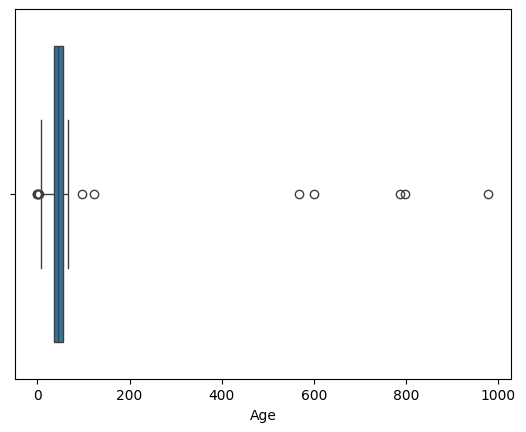

In [9]:
# making a plot to see if there are any outliers in age
import seaborn as sns

sns.boxplot(x=df['Age'])
plt.show()


In [10]:
#capping age to 100 and age is not 0
df["Age"] = df["Age"].clip(upper=100)
df = df[df['Age'] != 0]

In [11]:
#experience is not greater than age and is not negative
df.loc[df['Experience'] > df['Age'], 'Experience'] = df['Age']
df['Experience'] = df['Experience'].clip(lower=0)

<ipython-input-11-267007b03496>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Experience'] = df['Experience'].clip(lower=0)


In [12]:
df["Age"].describe()

count    4998.000000
mean       45.376351
std        11.695635
min         2.000000
25%        35.000000
50%        45.000000
75%        55.000000
max       100.000000
Name: Age, dtype: float64

In [13]:
mean_income = df['Income'].mean()
df.loc[:,'Income'] =df['Income'].fillna(mean_income)

In [14]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4959.000000,4998.000000
mean,45.376351,20.103241,72.735604,93152.697479,2.396158,1.937708,1.880352,56.452981,0.104442,0.060224,0.597096,0.293918
std,11.695635,11.444227,45.101658,2122.216056,1.147655,1.747983,0.839829,101.650801,0.305863,0.237925,0.490531,0.455600
min,2.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,94.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,1.000000,1.000000
max,100.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.isna().sum()

Age                      0
Gender                1596
Experience               0
Income                   0
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  39
CreditCard               0
dtype: int64

In [16]:
#filling missing value with 'O'
df["Gender"].fillna("O",inplace = True)

<ipython-input-16-d3c1d8befaf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"].fillna("O",inplace = True)


In [17]:
#checking if there are other values
df["Gender"].unique()

array(['M', 'F', 'O', '#', '-'], dtype=object)

In [18]:
#replacing other values to "O"
df.loc[:,'Gender'] = df['Gender'].replace(['#', '-'], 'O')

In [19]:
#rechecking the unique values
df["Gender"].unique()

array(['M', 'F', 'O'], dtype=object)

In [20]:
df["Home Ownership"].unique()

array(['Home Owner', 'Rent', 'Home Mortage', nan], dtype=object)

In [21]:
# Correct typos
df.loc[:,'Home Ownership'] = df['Home Ownership'].replace('Home Mortage', 'Home Mortgage')

# Find the most frequent home ownership
most_frequent_home_ownership = df['Home Ownership'].mode()[0]
df.loc[:,'Home Ownership'] = df.loc[:,'Home Ownership'].fillna(most_frequent_home_ownership)

In [22]:
df.isna().sum()

Age                    0
Gender                 0
Experience             0
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Home Ownership         0
Personal Loan          0
Securities Account     0
CD Account             0
Online                39
CreditCard             0
dtype: int64

In [23]:
most_frequent_online = df['Online'].mode()[0]

# Fill missing values in the "Online" column with the most frequent value
df['Online'].fillna(most_frequent_online, inplace=True)

In [24]:
df['Online']=df['Online'].astype(int)

In [25]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,45.376351,20.103241,72.735604,93152.697479,2.396158,1.937708,1.880352,56.452981,0.104442,0.060224,0.600240,0.293918
std,11.695635,11.444227,45.101658,2122.216056,1.147655,1.747983,0.839829,101.650801,0.305863,0.237925,0.489898,0.455600
min,2.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,94.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,1.000000,1.000000
max,100.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df.isna().sum()

Age                   0
Gender                0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Home Ownership        0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [27]:
df['Personal Loan'].describe()

count     4998
unique       3
top          0
freq      4520
Name: Personal Loan, dtype: int64

In [28]:
df["Personal Loan"].unique()

array([0, 1, ' '], dtype=object)

In [29]:
df["Personal Loan"].value_counts()

Personal Loan
0    4520
1     477
        1
Name: count, dtype: int64

In [30]:
df = df[df['Personal Loan'] != ' ']

In [31]:
# Convert the "Personal Loan" column to integers
df.loc[:,"Personal Loan"] = df["Personal Loan"].astype(int)

In [32]:
df["Personal Loan"].dtype

dtype('O')

In [33]:
df["ZIP Code"].unique().shape

(467,)

In [34]:
df['ZIP Code'] = df['ZIP Code'].astype(str)

<ipython-input-34-85b570d65657>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ZIP Code'] = df['ZIP Code'].astype(str)


In [35]:
df.head()

,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0,0
1,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0,0
2,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0,0
3,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0,0
4,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0,1


In [36]:
for col in df.columns:
    print(f"{df[col]}: {df[col].dtype}")

0       25
1       45
2       39
3       35
4       35
        ..
4995    29
4996    30
4997    63
4998    65
4999    28
Name: Age, Length: 4997, dtype: int64: int64
0       M
1       M
2       M
3       M
4       M
       ..
4995    O
4996    O
4997    O
4998    O
4999    O
Name: Gender, Length: 4997, dtype: object: object
0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 4997, dtype: int64: int64
0        49.0
1        34.0
2        11.0
3       100.0
4        45.0
        ...  
4995     40.0
4996     15.0
4997     24.0
4998     49.0
4999     83.0
Name: Income, Length: 4997, dtype: float64: float64
0       91107
1       90089
2       94720
3       94112
4       91330
        ...  
4995    92697
4996    92037
4997    93023
4998    90034
4999    92612
Name: ZIP Code, Length: 4997, dtype: object: object
0       4
1       3
2       1
3       1
4       4
       ..
4995    1
4996    4
4997    2

In [37]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000
mean,45.379027,20.105864,72.723744,2.395838,1.937876,1.880328,56.381829,0.104463,0.060236,0.600160,0.293976
std,11.695275,11.443870,45.098376,1.147545,1.748118,0.839912,101.536425,0.305890,0.237948,0.489914,0.455627
min,2.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,94.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,1.000000,1.000000
max,100.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000


In [38]:

Y = df['Personal Loan'].astype(int)
X = df.drop('Personal Loan',axis = 1)

In [39]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 4997, dtype: int64

In [40]:
X

,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Securities Account,CD Account,Online,CreditCard
0,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,1,0,0,0
1,45,M,19,34.0,90089,3,1.5,1,0,Rent,1,0,0,0
2,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0
3,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0
4,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,O,3,40.0,92697,1,1.9,3,0,Home Mortgage,0,0,1,0
4996,30,O,4,15.0,92037,4,0.4,1,85,Home Mortgage,0,0,1,0
4997,63,O,39,24.0,93023,2,0.3,3,0,Home Mortgage,0,0,0,0
4998,65,O,40,49.0,90034,3,0.5,2,0,Home Mortgage,0,0,1,0


In [41]:
#getting categorical features for encoding
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features

Index(['Gender', 'ZIP Code', 'Home Ownership'], dtype='object')

In [42]:

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
numeric_features

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [43]:
encoder = OrdinalEncoder()

# Fit and transform the categorical features
X_encoded = X.copy()
X_encoded[categorical_features] = encoder.fit_transform(X[categorical_features])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [46]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 97.90%


In [61]:
y_pred = model.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred, average='binary') # Use 'macro' or 'micro' if it's a multi-class classification
print(f'Precision: {precision*100:.2f}%')

# Calculate recall
recall = recall_score(y_test, y_pred, average='binary')
print(f'Recall: {recall*100:.2f}%')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1 Score: {f1*100:.2f}%')

Precision: 98.70%
Recall: 79.17%
F1 Score: 87.86%


In [48]:
X_encoded

,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Securities Account,CD Account,Online,CreditCard
0,25,1.0,1,49.0,82.0,4,1.6,1,0,1.0,1,0,0,0
1,45,1.0,19,34.0,33.0,3,1.5,1,0,2.0,1,0,0,0
2,39,1.0,15,11.0,367.0,1,1.0,1,0,2.0,0,0,0,0
3,35,1.0,9,100.0,298.0,1,2.7,2,0,2.0,0,0,0,0
4,35,1.0,8,45.0,95.0,4,1.0,2,0,2.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,2.0,3,40.0,208.0,1,1.9,3,0,0.0,0,0,1,0
4996,30,2.0,4,15.0,140.0,4,0.4,1,85,0.0,0,0,1,0
4997,63,2.0,39,24.0,234.0,2,0.3,3,0,0.0,0,0,0,0
4998,65,2.0,40,49.0,14.0,3,0.5,2,0,0.0,0,0,1,0


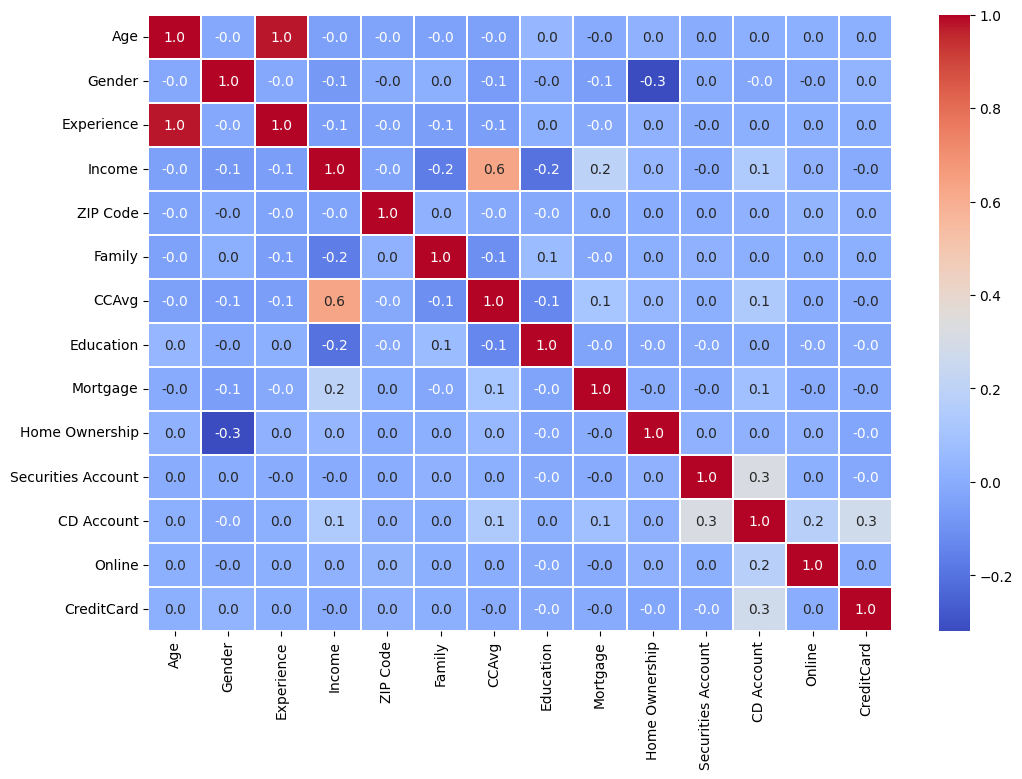

In [49]:
#correlation between variables in a heat map
plt.figure(figsize=(12,8))
sns.heatmap(X_encoded.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [50]:
# def predict():
#     cols = X_encoded.columns
#     user_input = {}
#     for col in cols:
#         print(col)
#         user_input[col] = input("Ans: ")
#     print(user_input)
#     user_input = pd.DataFrame([user_input])
#     # user_input[categorical_features] = encoder.transform(user_input[categorical_features])
#     prediction = model.predict(user_input)
#     print("prediction:",prediction)

# # predict()

In [51]:
input ={'Age': '56', 'Gender': '1', 'Experience': '3', 'Income': '32', 'ZIP Code': '3', 'Family': '4', 'CCAvg': '12', 'Education': '1', 'Mortgage': '0', 'Home Ownership': '3', 'Securities Account': '1', 'CD Account': '1', 'Online': '0', 'CreditCard': '1'}

In [52]:
user_input = pd.DataFrame([input])
user_input

,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Securities Account,CD Account,Online,CreditCard
0,56,1,3,32,3,4,12,1,0,3,1,1,0,1


In [53]:
prediction = model.predict(user_input)
prediction[0]

1

In [54]:
#saving the model using joblib
from joblib import dump, load

# Assuming model is your trained Random Forest model
dump(model, 'bank_loan.joblib')

['bank_loan.joblib']

In [55]:
encoded_mapping = {feature: encoder.categories_[i] for i, feature in enumerate(categorical_features)}

In [56]:
encoded_mapping

{'Gender': array(['F', 'M', 'O'], dtype=object),
 'ZIP Code': array(['90005', '90007', '90009', '90011', '90016', '90018', '90019',
        '90024', '90025', '90027', '90028', '90029', '90032', '90033',
        '90034', '90035', '90036', '90037', '90041', '90044', '90045',
        '90048', '90049', '90057', '90058', '90059', '90064', '90065',
        '90066', '90068', '90071', '90073', '90086', '90089', '90095',
        '90210', '90212', '90230', '90232', '90245', '90250', '90254',
        '90266', '90272', '90274', '90275', '90277', '90280', '90291',
        '90304', '90401', '90404', '90405', '90502', '90503', '90504',
        '90505', '90509', '90601', '90623', '90630', '90638', '90639',
        '90640', '90650', '90717', '90720', '90740', '90745', '90747',
        '90755', '90813', '90840', '91006', '91007', '91016', '91024',
        '91030', '91040', '91101', '91103', '91105', '91107', '91109',
        '91116', '91125', '91129', '91203', '91207', '91301', '91302',
        '91304',

In [57]:
#also saving the encoded_mappings
dump(encoded_mapping, 'encoded_mapping.joblib')

['encoded_mapping.joblib']

In [58]:
dump(df, 'df.joblib')

['df.joblib']